# Tutorial: Fourier Observables 

## Learning goals
- Calculation of $n(\mathbf k, t)$ 
- Calculation of $\mathbf v(\mathbf k,t )$

Let's see how to calculate $n(\mathbf k,t)$ and $\mathbf v(\mathbf k,t)$ in Sarkas. The first thing we need are all the possible $\mathbf k$ values.

## Discrete k-vectors

As mentioned, in a cuboid box, the allowed k-vectors are:

$$\mathbf{k} = \left(\frac{2\pi n_x}{L_x}, \frac{2\pi n_y}{L_y}, \frac{2\pi n_z}{L_z} \right)$$

where $n_x$, $n_y$, and $n_z$ are integers. The function `kspace_setup` is designed to calculate all allowed $\mathbf k$-vectors for a given system. It performs several key operations to prepare $\mathbf k$-vectors for further analysis:

1. Generation of $\mathbf k$-vectors: Based on the specified `angle_averaging` method, the function produces a set of $\mathbf k$-vectors. The method chosen determines the comprehensiveness of the $\mathbf k$-space sampling.

2. Magnitude calculation: For each generated $\mathbf k$-vector, the function computes its magnitude. This step is crucial for subsequent sorting and analysis.

3. Sorting: The function organizes the $\mathbf k$-vectors in ascending order based on their magnitudes. This sorting facilitates efficient processing and analysis in later stages.

4. Frequency analysis: The function performs a count of the occurrences of each unique $\mathbf k$-vector magnitude. This step provides valuable information about the distribution of $\mathbf k$-vectors in the system.

5. Indexing: Finally, the function assigns a unique index to each $\mathbf k$-vector. These indices are particularly useful in subsequent calculations, such as structure factor computations.

### What is `angle_averaging`?

If the system under consideration is isotropic observables depend only on the magnitude of $\mathbf k$, not its direction. To reduce statistical noise and improve computational efficiency, we can average over the directions (angles) of $\mathbf k$. For instance, in an isotropic system, there's no inherent reason to prefer $\mathbf k_x = [1, 0, 0]$ over $\mathbf k_y = [0, 1, 0]$ or $\mathbf k_z = [0, 0, 1]$ when they have the same magnitude.

The `angle_averaging` parameter in `kspace_setup` allows users to control how this averaging is performed, balancing between computational cost and the comprehensiveness of $\mathbf k$-space sampling. There are three options.

#### 1. "full"

This option provides the most comprehensive sampling of $\mathbf k$-space.

- Generates all possible combinations of $\mathbf k$-vectors up to `max_k_harmonics` in each direction.
- Includes the zero vector $[0, 0, 0]$ as the first $\mathbf k$-vector.
- $\mathbf k$-vectors are generated as: $[2\pi n_x/L_x, 2\pi n_y/L_y, 2\pi n_z/L_z]$
  where $n_x$, $n_y$, $n_z$ range from 0 to their respective `max_k_harmonics` value.
- Pros: Most accurate representation of $\mathbf k$-space.
- Cons: Computationally expensive, especially for large systems or high `max_k_harmonics` values.

#### 2. "principal_axis"

This option samples $\mathbf k$-vectors only along the principal axes of the system.

- Generates $\mathbf k$-vectors exclusively along the x, y, and z axes.
- Excludes the zero vector $[0, 0, 0]$.
- $\mathbf k$-vectors are generated in three sets:
  1. $[2\pi n_x/L_x, 0, 0]$ for $n_x$ from 1 to `max_k_harmonics[0]`
  2. $[0, 2\pi n_y/L_y, 0]$ for $n_y$ from 1 to `max_k_harmonics[1]`
  3. $[0, 0, 2\pi n_z/L_z]$ for $n_z$ from 1 to `max_k_harmonics[2]`
- Pros: Computationally efficient, suitable for systems with strong directional anisotropy.
- Cons: Limited sampling of $\mathbf k$-space, may miss important off-axis contributions.

#### 3. "custom"

This option offers a compromise between the "full" and "principal_axis" methods.

- Combines aspects of both "full" and "principal_axis" sampling.
- First generates all possible combinations of $\mathbf k$-vectors up to `max_aa_harmonics`.
- Then appends additional $\mathbf k$-vectors along the principal axes up to `max_k_harmonics`.
- Pros: 
  - Provides detailed sampling in the low-$\mathbf k$ region (up to `max_aa_harmonics`).
  - Captures higher-$\mathbf k$ contributions along the principal axes.
  - Balances comprehensiveness and computational efficiency.
- Cons: Requires careful selection of `max_aa_harmonics` and `max_k_harmonics` to optimize performance.

The choice of `angle_averaging` depends on your specific system and computational resources. If your system is not isotropic choose `principal_axis`.

Let's try out some code.

In [1]:
import numpy as np
from sarkas.tools.observables import kspace_setup

# Define parameters
box_lengths = np.array([10.0, 10.0, 10.0])
angle_averaging = "full"
max_k_harmonics = np.array([5, 5, 5])
max_aa_harmonics = np.array([3, 3, 3])

# Call the function
k_arr, k_counts, k_unique, harmonics = kspace_setup(box_lengths, angle_averaging, max_k_harmonics, max_aa_harmonics)

# Print the results
print(f"\nk_arr = [n_x, n_y, n_z, magnitude, index]")
display(k_arr[:10])

# Print the k_counts
print(f"\nk_counts = The number of time each unique magnitude of k is repeated")
display(k_counts[:10])

# Print the k_unique
print(f"\nk_unique = The unique magnitudes of k")
display(k_unique[:10])

# Print the harmonics
print(f"\nharmonics = The harmonics of each k-vector")
display(harmonics[:10])


k_arr = [n_x, n_y, n_z, magnitude, index]


array([[0.        , 0.1       , 0.        , 0.1       , 0.        ],
       [0.1       , 0.        , 0.        , 0.1       , 0.        ],
       [0.        , 0.        , 0.1       , 0.1       , 0.        ],
       [0.        , 0.1       , 0.1       , 0.14142136, 1.        ],
       [0.1       , 0.        , 0.1       , 0.14142136, 1.        ],
       [0.1       , 0.1       , 0.        , 0.14142136, 1.        ],
       [0.1       , 0.1       , 0.1       , 0.17320508, 2.        ],
       [0.2       , 0.        , 0.        , 0.2       , 3.        ],
       [0.        , 0.        , 0.2       , 0.2       , 3.        ],
       [0.        , 0.2       , 0.        , 0.2       , 3.        ]])


k_counts = The number of time each unique magnitude of k is repeated


array([3, 3, 1, 3, 6, 3, 3, 3, 3, 6])


k_unique = The unique magnitudes of k


array([0.1       , 0.14142136, 0.17320508, 0.2       , 0.2236068 ,
       0.24494897, 0.28284271, 0.3       , 0.3       , 0.31622777])


harmonics = The harmonics of each k-vector


array([[0.        , 1.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 1.        , 0.        ],
       [0.        , 1.        , 1.        , 1.41421356, 1.        ],
       [1.        , 0.        , 1.        , 1.41421356, 1.        ],
       [1.        , 1.        , 0.        , 1.41421356, 1.        ],
       [1.        , 1.        , 1.        , 1.73205081, 2.        ],
       [2.        , 0.        , 0.        , 2.        , 3.        ],
       [0.        , 0.        , 2.        , 2.        , 3.        ],
       [0.        , 2.        , 0.        , 2.        , 3.        ]])

## Density modes 

Let's move now to the calculation of $n(\mathbf k,t)$ by looking at a specific example. The system under consideration is a binary mixture of Carbon and Oxygen atoms interacting via a Yukawa potential. The input file can be found here :ref:`input_files/ybim_mks_pppm.yaml`. For reference, we reproduce the first few lines 
    
    Particles:
        - Species:
            name: C
            number_density: 1.0e+30       # /m^3
            num: 10000                    # total number of particles of ion1
            Z: 6.0                        # degree of ionization
            atomic_weight: 12.011                      # atomic mass
            temperature: 1.02e+5
    
        - Species:
            name: O
            number_density: 1.0e+30       # /m^3
            num: 10000
            Z: 8.0                      # degree of ionization
            atomic_weight: 16                   # atomic mass
            temperature: 1.02e+5

The next few lines of code initialize the `PostProcess` class and import the usual libraries.

In [2]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import PostProcess

# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'ybim_mks_pppm.yaml')

postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

Because $n(\mathbf k,t)$ is usually associated with the calculation of the static structure factor $S(k)$, in the next cell we import the observable `StaticStructureFactor` and instantiate the object `dsf`. Another reason for using this class is because we need to instantiate all 

In [3]:
from sarkas.tools.observables import StaticStructureFactor

ssf = StaticStructureFactor()
ssf.max_ka_value = 10
ssf.angle_averaging = 'principal_axis'

The choice `ssf.max_ka_value = 10` means that we want to calculate all the $\mathbf k$ vectors up to the maximum magnitude of $ka_{\rm ws} = 10$, but only along the principal axis `ssf.angle_averaging = 'principal_axis'`. Let's setup the rest of the class attributes

In [4]:
ssf.setup(
    postproc.parameters,
    no_slices=1 # For simplicity we use all the data.
)



===================== Static Structure Function ======================
Data saved in: 
 SarkasSimulations/CO_mks_pppm/PostProcessing/StaticStructureFunction/Production/StaticStructureFunction_CO_mks_pppm.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 6001
Total time per block: T = 3.2227e-13 [s] ~ 179 plasma periods
Time interval: dt = 5.3709e-17 [s] ~ 3.0e-02 plasma period

k-space information:
k wave vector information saved in:
 SarkasSimulations/CO_mks_pppm/PostProcessing/k_space_data/k_arrays.npz
Data accessible at: self.k_list, self.k_counts, self.ka_values

Wave vector parameters:
Smallest wave vector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.1436 / a_ws = 2.9164e+09 [1/m]

Angle averaging choice: principal_axis
	Maximum k harmonics = n_x, n_y, n_z = 69.0, 69.0, 69.0
	Largest wave vector k_max = k_min * n_x
	k_max = 9.9081 / a_ws = 2.0123e+11 [1/m]

Total number of k values to calculate = 207
No. of uni

That's a lot of information, but for the moment we are only interested in the following 

    k-space information:
    k wave vector information saved in:
     SarkasSimulations/CO_mks_pppm/PostProcessing/k_space_data/k_arrays.npz
    Data accessible at: self.k_list, self.k_counts, self.ka_values
    
    Wave vector parameters:
    Smallest wave vector k_min = 2 pi / L = 3.9 / N^(1/3)
    k_min = 0.1436 / a_ws = 2.9164e+09 [1/m]
    
    Angle averaging choice: principal_axis
    	Maximum k harmonics = n_x, n_y, n_z = 69.0, 69.0, 69.0
    	Largest wave vector k_max = k_min * n_x
    	k_max = 9.9081 / a_ws = 2.0123e+11 [1/m]
    
    Total number of k values to calculate = 207
    No. of unique ka values to calculate = 69
    
    n(k,t) data saved in: 
     SarkasSimulations/CO_mks_pppm/PostProcessing/k_space_data/nkt.h5

which tells us where the data is stored and some useful information on our choice of parameters. 

Let's calculate $n(\mathbf k,t)$ by calling `ssf.calc_kt_data()` with the option `data_type = n`. This function reads the positions or velocities of the particles from the H5MD file in chunks of size `min(1000, self.no_dumps)`. Each chunk of data is then sent to the method `calc_kt_chunk` which redirects the chunks for the actual calculation of $n(k,t)$ or $\mathbf v(\mathbf k,t)$. The output array is then stored into an HDF5 file, see attribute `nkt_hdf_file` or `vkt_hdf_file`. The file is organized hierarchically to separate data for each species while maintaining common information at the root level.

In [5]:
ssf.calc_kt_data(data_type='n')

Calculating n(k,t) in chunks:   0%|          | 0/7 [00:00<?, ?it/s]

n(k,t) stored in SarkasSimulations/CO_mks_pppm/PostProcessing/k_space_data/nkt.h5


### Storage of n(k,t)

At the root of the file, you'll find

- A group for each species in your simulation with a dataset
    - `nkt` with shape `(len(species_np), len(k_list), no_dumps)`,
- A dataset named 'k_list' storing the attribute `k_list`
- Several attributes containing metadata
    -`no_species`: Number of species in the simulation
    -`species_names`: List of species names
    -`no_dumps`: Total number of time steps
    -`dump_step`: Time step interval
    -`max_chunk_size`: Maximum chunk size used for calculations
    -`max_k_harmonics`: Maximum number of k harmonics
    -`angle_averaging`: Boolean indicating if angle averaging was used

The following code prints out the information of the HDF file 

In [10]:
import h5py

def print_hdf5_structure(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"Group: {name}")
        # Print attributes of the group
        if len(obj.attrs) > 0:
            print("  Attributes:")
            for key, value in obj.attrs.items():
                print(f"    {key}: {value}")
    elif isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name}")
        print(f"  Shape: {obj.shape}")
        print(f"  Type: {obj.dtype}")
        # Print attributes of the dataset
        if len(obj.attrs) > 0:
            print("  Attributes:")
            for key, value in obj.attrs.items():
                print(f"    {key}: {value}")


with h5py.File(ssf.nkt_hdf_file, 'r') as f:
    print("HDF5 File Structure:")
    f.visititems(print_hdf5_structure)
    
    print("\nRoot level attributes:")
    for key, value in f.attrs.items():
        print(f"  {key}: {value}")

# Read the data for each species
with h5py.File(ssf.nkt_hdf_file, 'r') as f:
    nkt_C = f["C/nkt"][:]
    nkt_O = f["O/nkt"][:]

HDF5 File Structure:
Group: C
Dataset: C/nkt
  Shape: (207, 6001)
  Type: complex128
Group: O
Dataset: O/nkt
  Shape: (207, 6001)
  Type: complex128
Dataset: k_list
  Shape: (207, 5)
  Type: float64

Root level attributes:
  angle_averaging: principal_axis
  dump_step: 5
  max_chunk_size: 1000
  max_k_harmonics: [69 69 69]
  no_dumps: 6001
  no_species: 2
  species_names: ['C' 'O']


Note that the shape of each `nkt` is `(207, 6001)` meaning that no averaging over the direction of $\mathbf k$ has been performed. If your system is isotropic you can perform the angle averaging as follows

In [25]:
import numpy as np
import h5py

def average_over_k_magnitudes(nkt_hdf_file, species, data_type = 'nkt'):
    """
    Average n(k,t) or v(k,t) data over k values with the same magnitude,
    using pre-calculated magnitudes and indices stored in k_list.
    
    Parameters:
    nkt_hdf_file (str): Path to the HDF5 file containing n(k,t) or v(k,t) data
    species (str): Name of the species to process
    
    Returns:
    tuple: (k_mag_unique, nkt_avg)
        k_mag_unique: Array of unique k magnitudes
        nkt_avg: Array of averaged n(k,t) or v(k,t) data
    """
    with h5py.File(nkt_hdf_file, 'r') as f:
        k_list = f['k_list'][:]
        nkt_data = f[species][data_type][:]
    
    # Extract k magnitudes and indices from k_list
    k_mag = k_list[:, 3]
    k_mag_indices = k_list[:, 4].astype(int)
    
    # Find unique k magnitudes
    k_mag_unique = np.unique(k_mag)
    
    # Initialize array for averaged data
    if nkt_data.ndim == 2:  # n(k,t) data
        nkt_avg = np.zeros((len(k_mag_unique), nkt_data.shape[1]), dtype=complex)
    elif nkt_data.ndim == 3:  # v(k,t) data
        nkt_avg = np.zeros((len(k_mag_unique), 3, nkt_data.shape[2]), dtype=complex)
    else:
        raise ValueError("Unexpected shape of data")
    
    # Perform averaging
    for i in range(len(k_mag_unique)):
        mask = (k_mag_indices == i)
        if nkt_data.ndim == 2:  # n(k,t) data
            nkt_avg[i] = np.mean(nkt_data[mask] * nkt_data[mask].conjugate(), axis=0)
        else:  # v(k,t) data
            nkt_avg[i] = np.mean(nkt_data[mask] * nkt_data[mask].conjugate(), axis=0)
    
    return nkt_avg

nkt_C_avg = average_over_k_magnitudes(ssf.nkt_hdf_file, 'C', 'nkt')

print(f"Shape of averaged data: {nkt_C_avg.shape}")
print(f"Number of unique k magnitudes: {len(k_mag_unique)}")

Shape of averaged data: (69, 6001)
Number of unique k magnitudes: 69


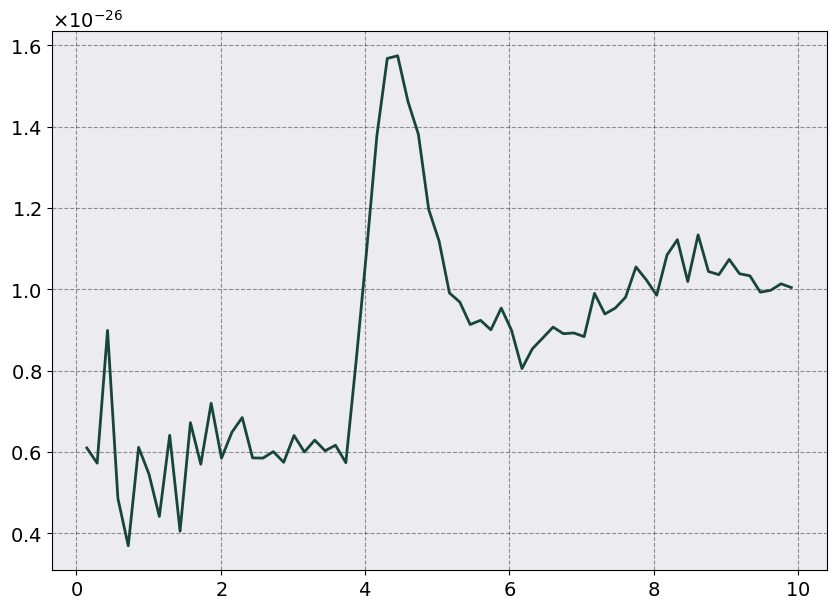

In [28]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


# Generate time array
time = np.arange(nkt_C_avg.shape[-1]) * ssf.dump_step

fig, ax = plt.subplots(1, 1)
ax.plot(ssf.ka_values, 1./np.sqrt(ssf.species_num_dens[0]**2) * (nkt_C_avg[:,:]).mean(axis = 1))
